In [64]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [65]:
print(os.getcwd())

C:\Users\ifenn\OneDrive\Desktop\Amdari Projects\Jewelry_Price_Optimisation\Notebook


In [66]:
df = pd.read_csv("C:/Users/ifenn/OneDrive/Desktop/Amdari Projects/Jewelry_Price_Optimisation/Data/Jewelry_Dataset.csv")
df.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [67]:
# Add column names
df.columns = [
    "Order datetime",
    "Order ID",
    "Purchased product ID",
    "Quantity of SKU in the order",
    "Category ID",
    "Category alias",
    "Brand ID",
    "Price in USD",
    "User ID",
    "Product gender",
    "Main Color",
    "Main metal",
    "Main gem",
]

df.head()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU in the order,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [68]:
# Display the first few rows and the column names
df.head(), df.columns.tolist()

(            Order datetime             Order ID  Purchased product ID  \
 0  2018-12-01 17:38:31 UTC  1924899396621697920   1806829193678291446   
 1  2018-12-02 13:53:42 UTC  1925511016616034733   1842214461889315556   
 2  2018-12-02 17:44:02 UTC  1925626951238681511   1835566849434059453   
 3  2018-12-02 21:30:19 UTC  1925740842841014667   1873936840742928865   
 4  2018-12-02 22:09:34 UTC  1925760595336888995   1835566854827934449   
 
    Quantity of SKU in the order   Category ID    Category alias  Brand ID  \
 0                             1  1.806829e+18               NaN       NaN   
 1                             1  1.806829e+18   jewelry.pendant       1.0   
 2                             1  1.806829e+18   jewelry.pendant       0.0   
 3                             1  1.806829e+18  jewelry.necklace       0.0   
 4                             1  1.806829e+18   jewelry.earring       1.0   
 
    Price in USD       User ID Product gender Main Color Main metal  Main gem  
 0  

In [69]:
#Data Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order datetime                95910 non-null  object 
 1   Order ID                      95910 non-null  int64  
 2   Purchased product ID          95910 non-null  int64  
 3   Quantity of SKU in the order  95910 non-null  int64  
 4   Category ID                   90558 non-null  float64
 5   Category alias                85977 non-null  object 
 6   Brand ID                      91125 non-null  float64
 7   Price in USD                  90558 non-null  float64
 8   User ID                       90558 non-null  float64
 9   Product gender                47743 non-null  object 
 10  Main Color                    88250 non-null  object 
 11  Main metal                    90448 non-null  object 
 12  Main gem                      61852 non-null  object 
dtypes

In [70]:
# Convert datetime to pandas datetime format
df['Order datetime'] = pd.to_datetime(df['Order datetime'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Order datetime                95910 non-null  datetime64[ns, UTC]
 1   Order ID                      95910 non-null  int64              
 2   Purchased product ID          95910 non-null  int64              
 3   Quantity of SKU in the order  95910 non-null  int64              
 4   Category ID                   90558 non-null  float64            
 5   Category alias                85977 non-null  object             
 6   Brand ID                      91125 non-null  float64            
 7   Price in USD                  90558 non-null  float64            
 8   User ID                       90558 non-null  float64            
 9   Product gender                47743 non-null  object             
 10  Main Color                    8825

In [71]:
df.describe(include='all') # Include non-numeric columns too

,Order datetime,Order ID,Purchased product ID,Quantity of SKU in the order,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
count,95910,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,85977,9.112500e+04,90558.000000,9.055800e+04,47743,88250,90448,61852
unique,NaN,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,2,5,3,30
top,NaN,NaN,NaN,NaN,NaN,jewelry.earring,NaN,NaN,NaN,f,red,gold,diamond
freq,NaN,NaN,NaN,NaN,NaN,29051,NaN,NaN,NaN,47379,69510,89081,29609
mean,2021-01-12 18:57:03.605140224+00:00,2.485191e+18,1.815970e+18,1.0,1.805947e+18,NaN,8.891036e+16,362.213017,1.512644e+18,NaN,NaN,NaN,NaN
min,2018-12-01 17:38:31+00:00,1.924899e+18,1.313551e+18,1.0,1.313678e+18,NaN,0.000000e+00,0.990000,1.313554e+18,NaN,NaN,NaN,NaN
25%,2020-08-20 06:48:53.750000128+00:00,2.379732e+18,1.515966e+18,1.0,1.806829e+18,NaN,0.000000e+00,145.620000,1.515916e+18,NaN,NaN,NaN,NaN
50%,2021-03-07 17:25:15+00:00,2.524282e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000e+00,258.770000,1.515916e+18,NaN,NaN,NaN,NaN
75%,2021-08-20 09:12:45+00:00,2.644347e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000e+00,431.370000,1.515916e+18,NaN,NaN,NaN,NaN
max,2021-12-01 09:59:07+00:00,2.719022e+18,2.541962e+18,1.0,1.806829e+18,NaN,1.550613e+18,34448.600000,1.554297e+18,NaN,NaN,NaN,NaN


In [72]:
#Data Quality Checks
# Missing values per column
df.isnull().sum()

Order datetime                      0
Order ID                            0
Purchased product ID                0
Quantity of SKU in the order        0
Category ID                      5352
Category alias                   9933
Brand ID                         4785
Price in USD                     5352
User ID                          5352
Product gender                  48167
Main Color                       7660
Main metal                       5462
Main gem                        34058
dtype: int64

In [73]:
# Check the columns needed
columns_needed = [
    "Category alias",
    "Brand ID",
    "Price in USD",
    "Product gender",
    "Main Color",
    "Main metal",
    "Main gem"
]

for col in columns_needed:
    print(f"\nTop values for '{col}':")
    print(df[col].value_counts(dropna=False).head(10))


Top values for 'Category alias':
Category alias
jewelry.earring       29051
jewelry.ring          28300
jewelry.pendant       13088
NaN                    9933
jewelry.bracelet       6188
0.00                   4392
jewelry.necklace       2361
jewelry.brooch         1288
jewelry.souvenir        170
electronics.clocks      167
Name: count, dtype: int64

Top values for 'Brand ID':
Brand ID
0.000000e+00    44599
1.000000e+00    32022
2.000000e+00     8966
NaN              4785
1.515916e+18      147
1.515916e+18      104
1.515916e+18       74
4.000000e+00       65
3.000000e+00       58
6.000000e+00       56
Name: count, dtype: int64

Top values for 'Price in USD':
Price in USD
NaN       5352
232.74     945
273.84     855
246.44     814
212.19     814
225.89     811
157.40     776
143.70     739
362.88     730
164.25     709
Name: count, dtype: int64

Top values for 'Product gender':
Product gender
NaN    48167
f      47379
m        364
Name: count, dtype: int64

Top values for 'Main Color

In [74]:
# Unique values per column
df[columns_needed].nunique()

Category alias     218
Brand ID          2537
Price in USD      3166
Product gender       2
Main Color           5
Main metal           3
Main gem            30
dtype: int64

In [75]:
#drop category ID column
df.drop(columns = ["Category ID"], inplace = True)

# drop junk rows from category alias
df = df[~df["Category alias"].isin([np.nan, "nan", "0.00"])]

#convert NaN to Unknown for Brand ID
df["Brand ID"] = df["Brand ID"].fillna("Unknown")

#convert NaN to Unknown for Produce gender
df["Product gender"] = df["Product gender"].fillna("Unknown")

#Replace unknown colour and NaN in main colour with Unkmown
df["Main Color"] = df["Main Color"].replace("unknown-color", "Unknown")
df["Main Color"] = df["Main Color"].fillna("Unknown")

#convert NaN to Unknown for Main Metal
df["Main metal"] = df["Main metal"].fillna("Unknown")

#convert NaN to Unknown for Main gem
df["Main gem"] = df["Main gem"].fillna("Unknown")

#drop rows with NaN for price in usd
df = df.dropna(subset = ["Price in USD"])

#drop user_id column
df.drop(columns = ["User ID"], inplace = True)

In [76]:
# Missing values per column
df.isnull().sum()

Order datetime                  0
Order ID                        0
Purchased product ID            0
Quantity of SKU in the order    0
Category alias                  0
Brand ID                        0
Price in USD                    0
Product gender                  0
Main Color                      0
Main metal                      0
Main gem                        0
dtype: int64

In [77]:
df.nunique()

Order datetime                  63555
Order ID                        63725
Purchased product ID             7920
Quantity of SKU in the order        1
Category alias                      9
Brand ID                            8
Price in USD                     2893
Product gender                      3
Main Color                          4
Main metal                          4
Main gem                           31
dtype: int64

In [78]:
duplicate = df.duplicated().sum()
print(duplicate)

2373


In [79]:
# Confirm removal
print("Shape before removing duplicates:", df.shape)

Shape before removing duplicates: (80625, 11)


In [80]:
# Remove duplicate rows
df = df.drop_duplicates()

# Confirm removal
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (78252, 11)


## Exploratory Data Analysis (EDA)

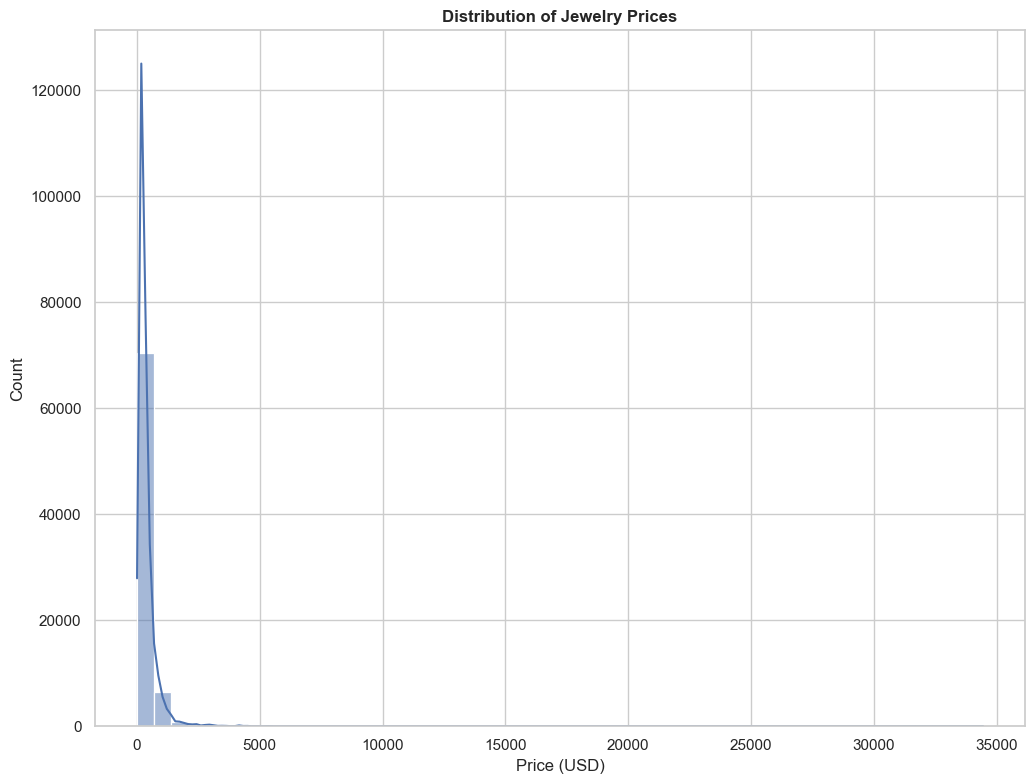

In [81]:
# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))

# 1. Distribution of Prices
plt.subplot(1, 2, 1)
sns.histplot(df['Price in USD'], bins=50, kde=True)
plt.title('Distribution of Jewelry Prices', fontweight='bold')
plt.xlabel('Price (USD)')

plt.tight_layout()
plt.show()

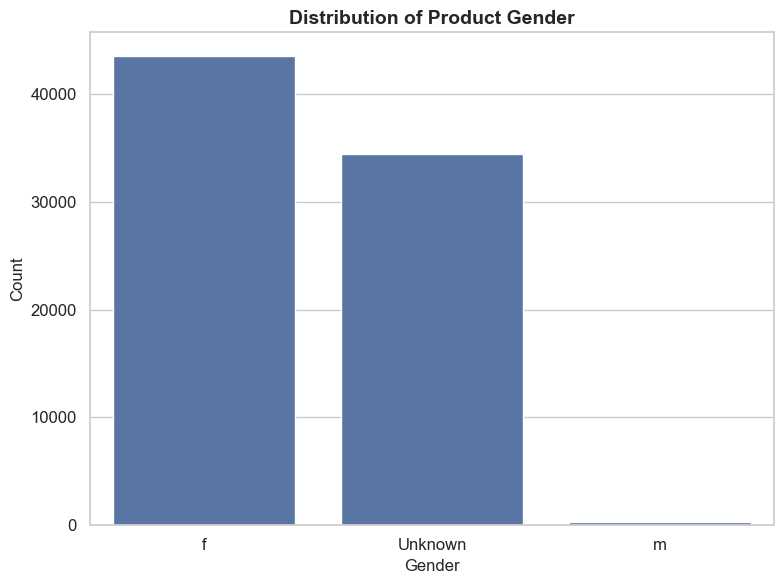

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Product gender')

plt.title('Distribution of Product Gender', fontweight='bold', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

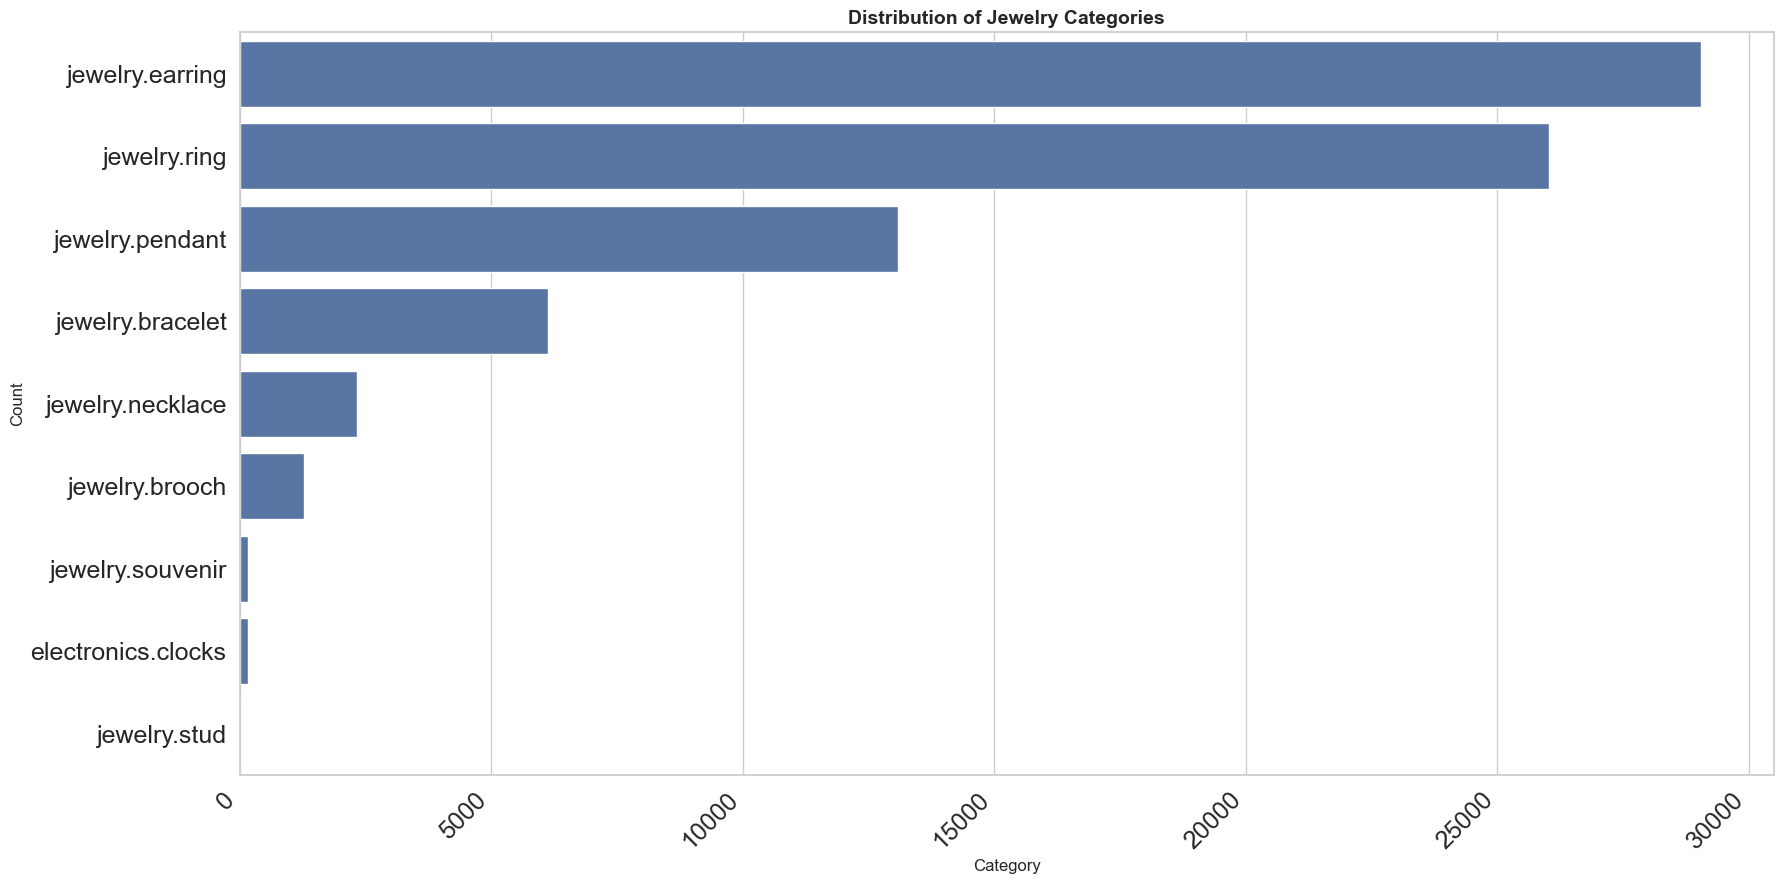

In [83]:
plt.figure(figsize=(18, 9))
sns.countplot(data=df, y='Category alias', order=df['Category alias'].value_counts().head(10).index)

plt.title('Distribution of Jewelry Categories', fontweight='bold', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

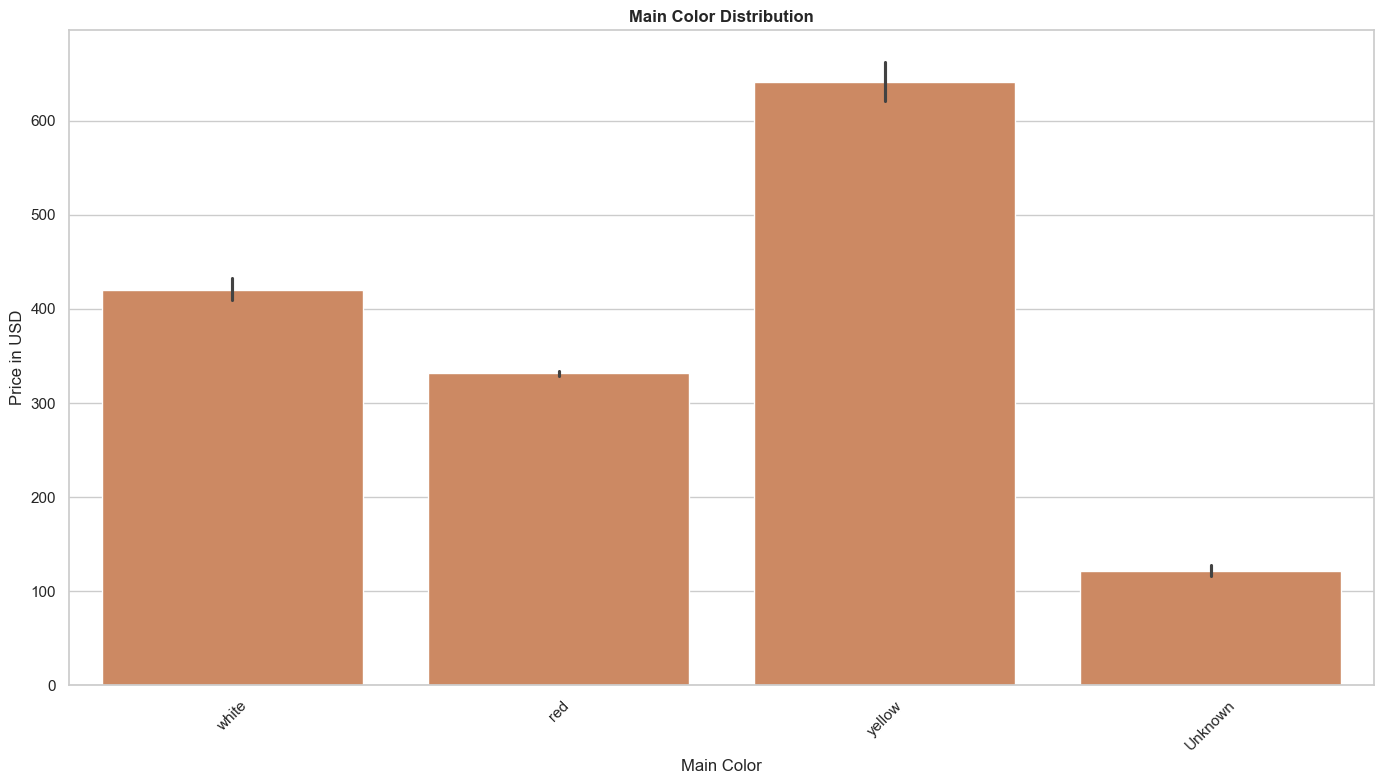

In [84]:
# 2. Boxplot: Price by Main Color
plt.figure(figsize=(14, 8))
plt.bar(3, 1, 2)
sns.barplot(data=df, x='Main Color', y='Price in USD')
plt.title('Main Color Distribution', fontweight='bold')
plt.xlabel('Main Color', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

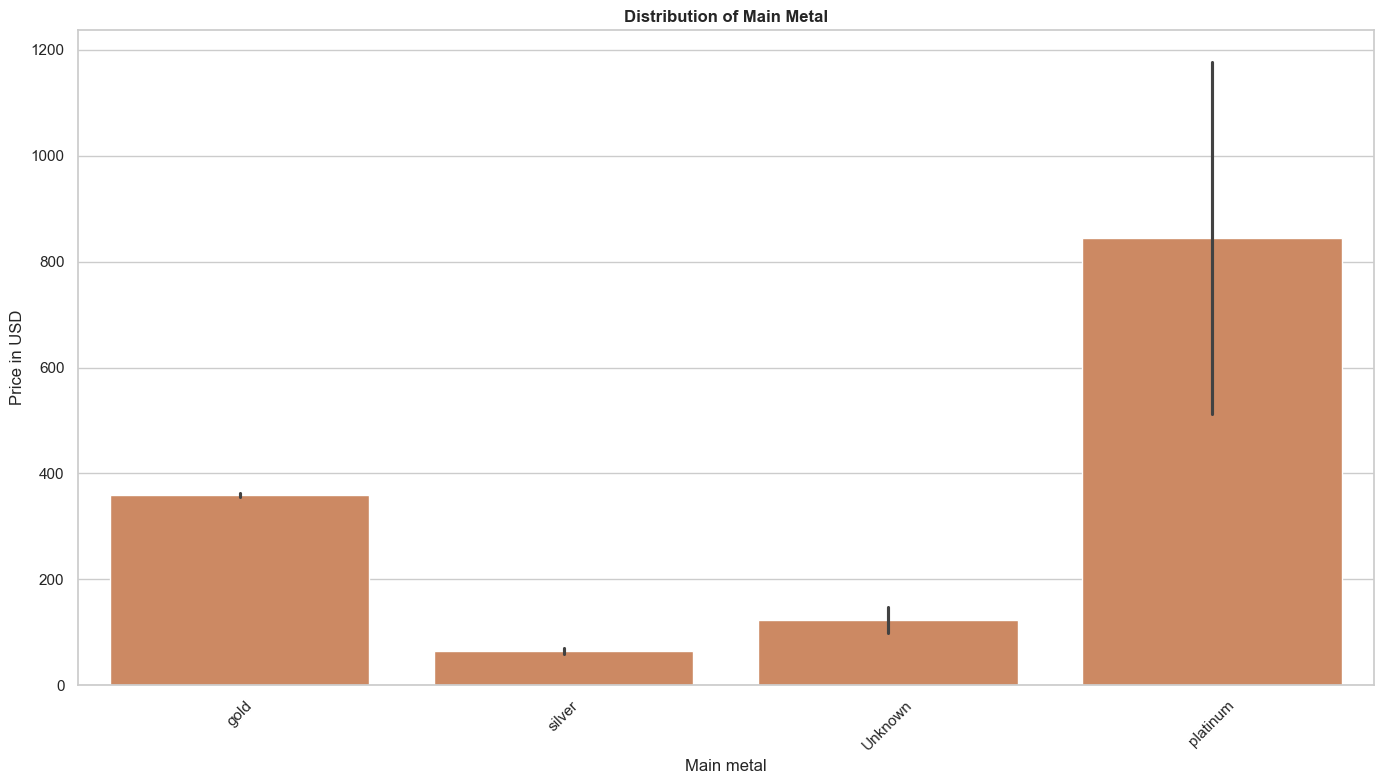

In [85]:
# 2. Boxplot: Price by Metal
plt.figure(figsize=(14, 8))
plt.bar(3, 1, 2)
sns.barplot(data=df, x='Main metal', y='Price in USD')
plt.title('Distribution of Main Metal', fontweight='bold')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

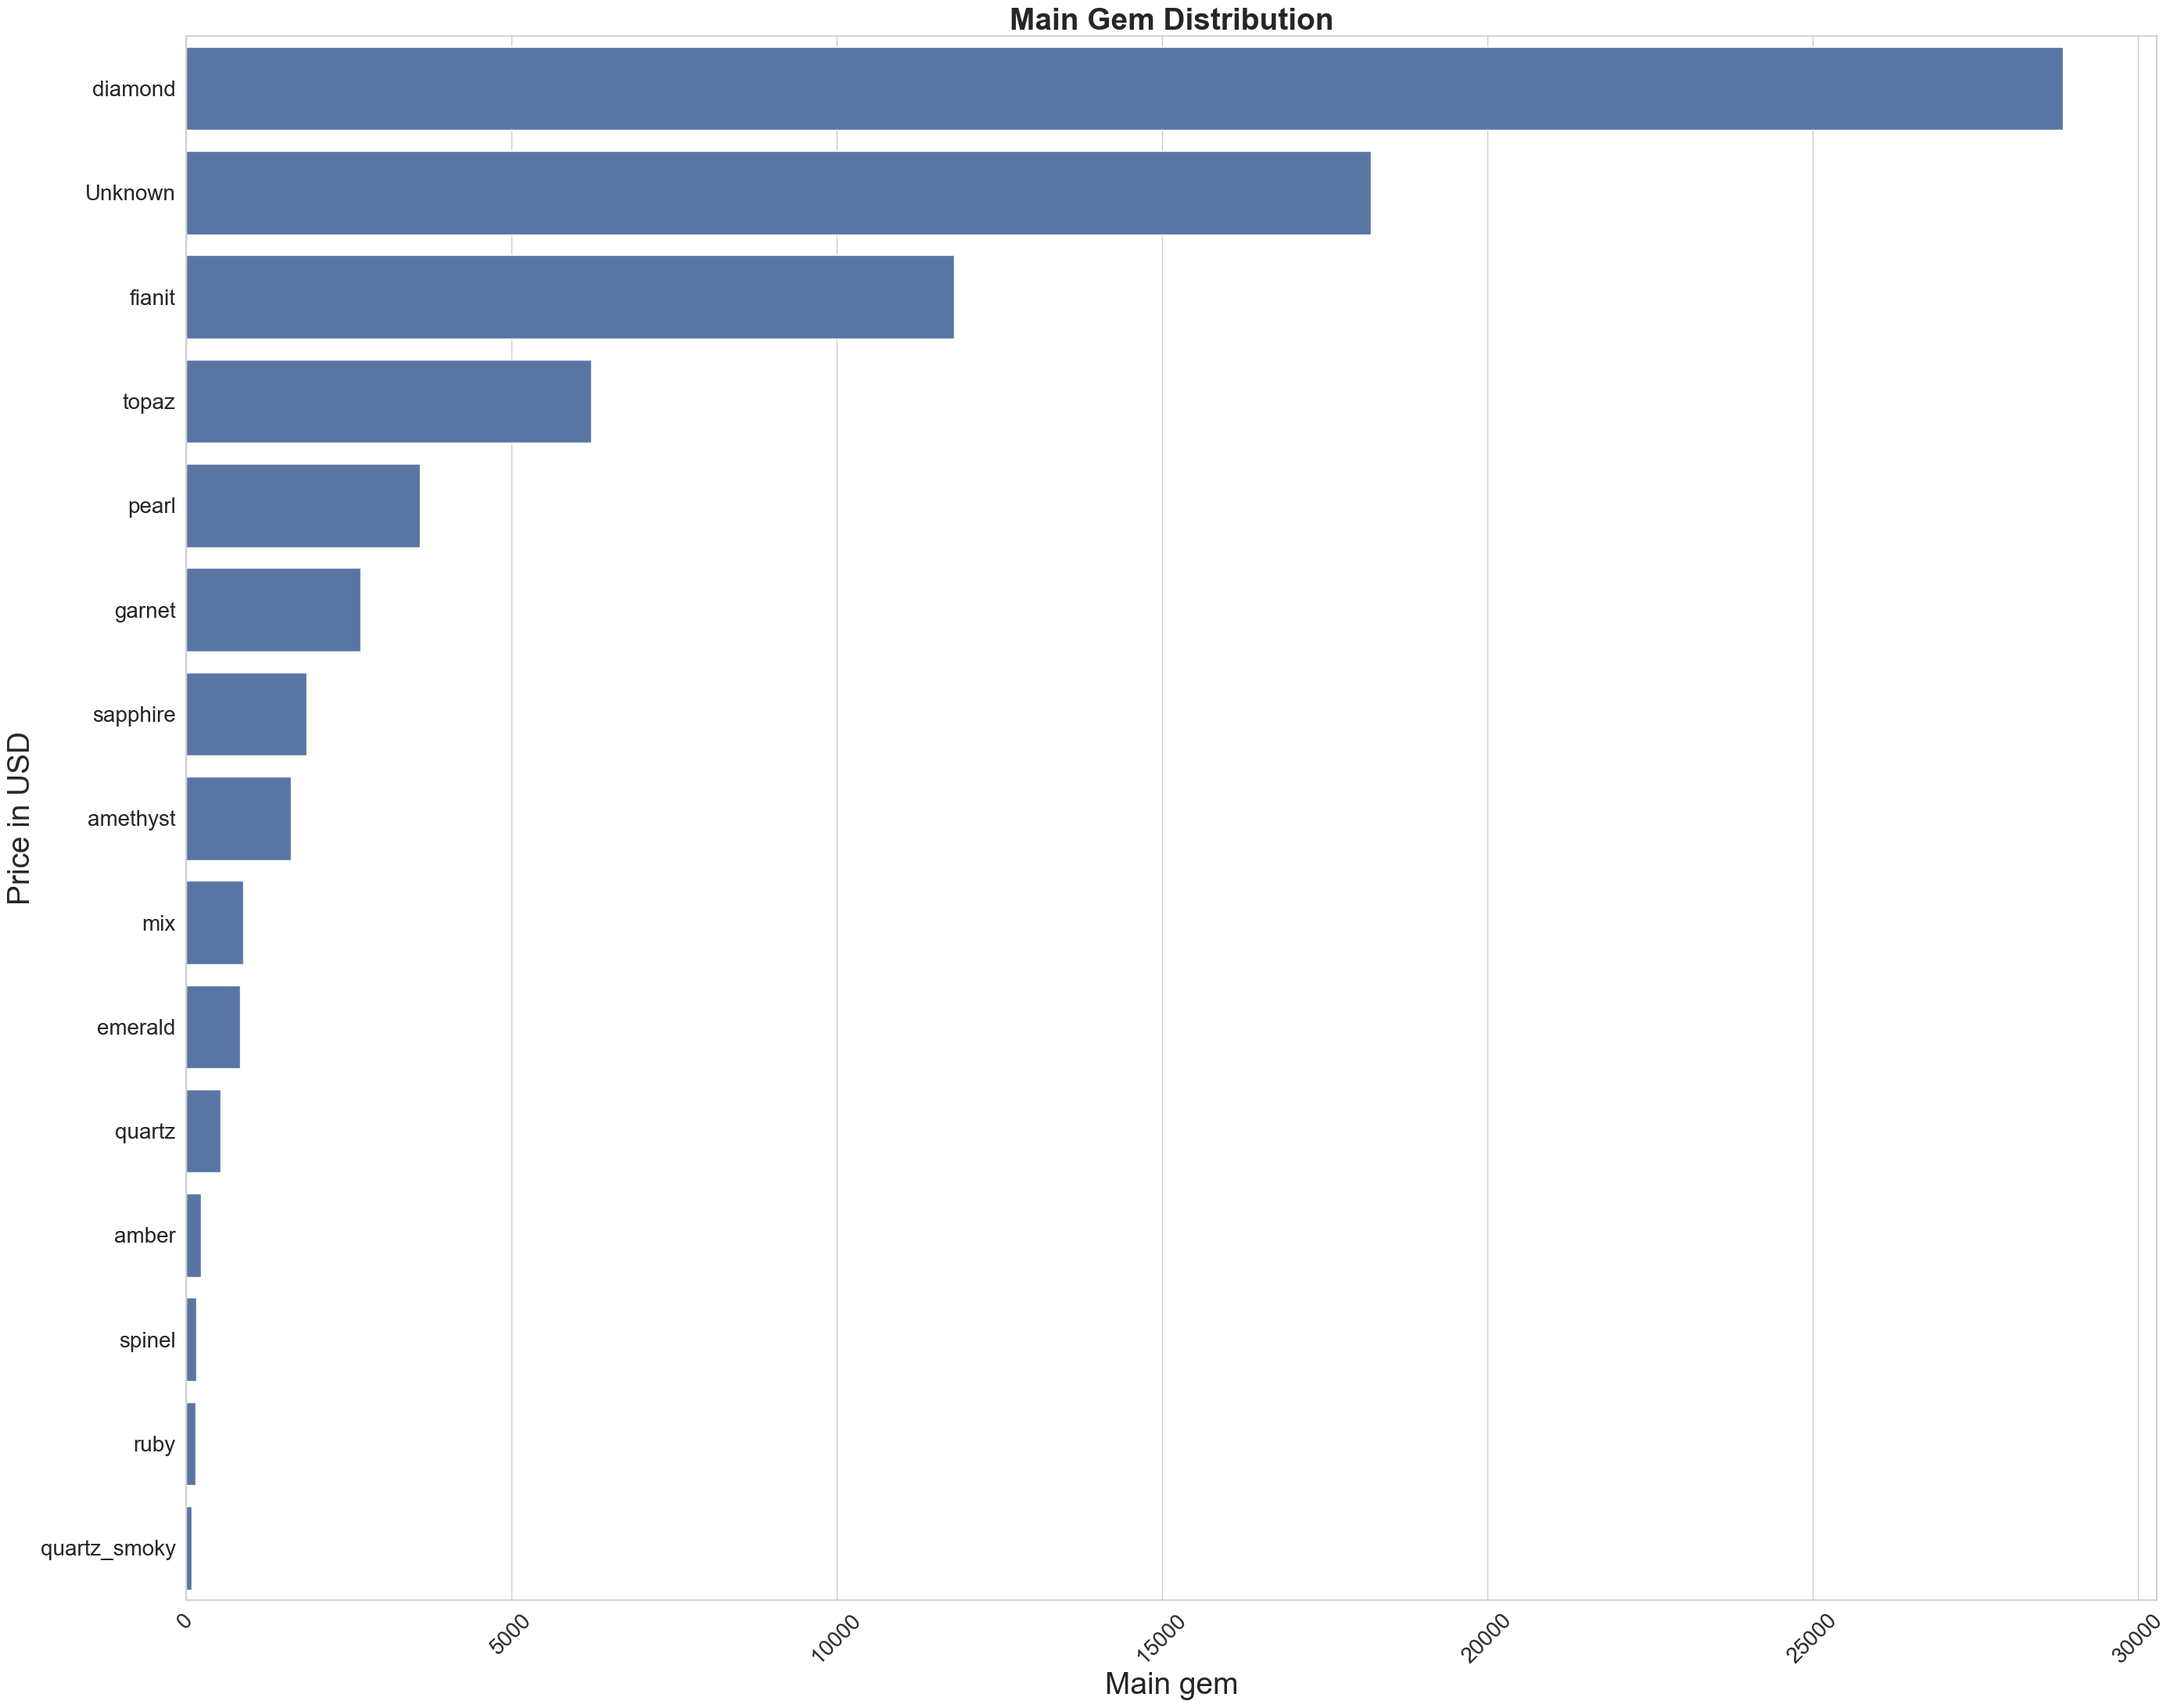

In [86]:
# 3. Boxplot: Price by Gem
plt.figure(figsize=(28, 22))
sns.countplot(data=df, y='Main gem', order=df['Main gem'].value_counts().head(15).index)
#plt.bar(6, 2, 6)
#sns.barplot(data=df, x='Main gem', y='Price in USD')
plt.title('Main Gem Distribution', fontweight='bold', fontsize=28)
plt.xlabel('Main gem', fontsize=28)
plt.ylabel('Price in USD', fontsize=28)

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

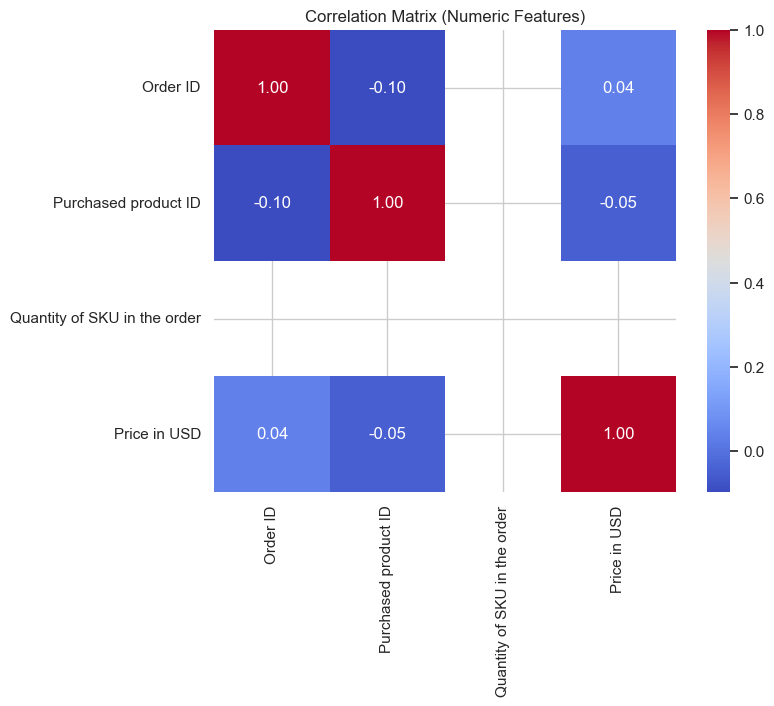

In [87]:
# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

In [88]:
# Count entries for each price threshold
thresholds = [500, 1000, 5000, 10000, 20000, 30000, 50000]
price_counts = {f'> ${t:,}': (df['Price in USD'] > t).sum() for t in thresholds}

# Display results
price_counts

{'> $500': 14799,
 '> $1,000': 3644,
 '> $5,000': 25,
 '> $10,000': 6,
 '> $20,000': 6,
 '> $30,000': 1,
 '> $50,000': 0}

In [89]:
# Handle outliers using IQR method
Q1 = df['Price in USD'].quantile(0.25)
Q3 = df['Price in USD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['Price in USD'] >= lower_bound) & (df['Price in USD'] <= upper_bound)]

# Count entries for each price threshold again after removing outliers
price_counts_no_outliers = {f'> ${t:,}': (df['Price in USD'] > t).sum() for t in thresholds}

# Display results
price_counts_no_outliers

{'> $500': 14799,
 '> $1,000': 3644,
 '> $5,000': 25,
 '> $10,000': 6,
 '> $20,000': 6,
 '> $30,000': 1,
 '> $50,000': 0}

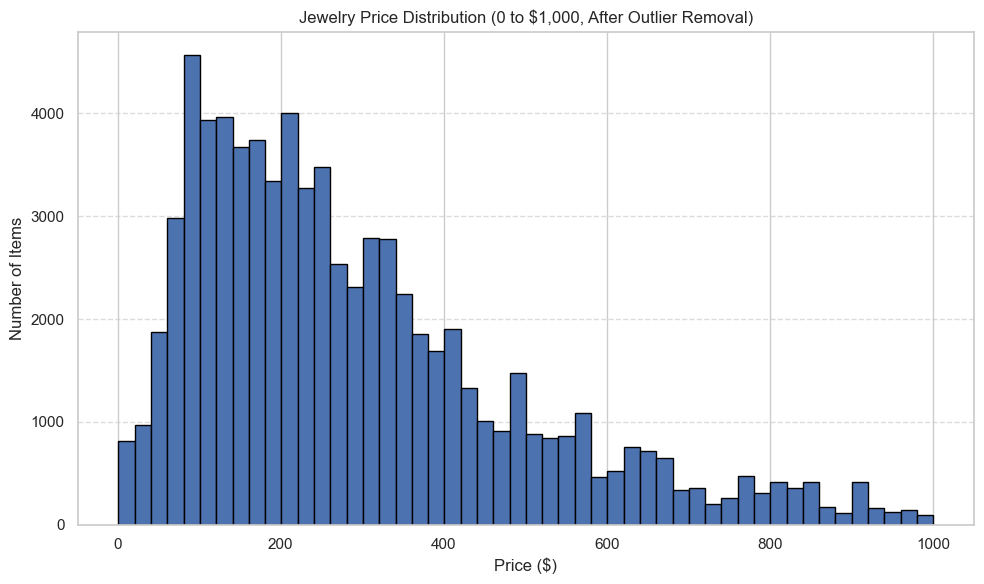

In [90]:
# Filter the data to include only prices between 0 and $1,000
df_under_1000 = df[df['Price in USD'] <= 1000]

# Plot the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df_under_1000['Price in USD'], bins=50, edgecolor='black')
plt.title('Jewelry Price Distribution (0 to $1,000, After Outlier Removal)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Items')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\ifenn\AppData\Local\Temp\ipykernel_24752\3419077381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_1000['log_price'] = np.log1p(df_under_1000['Price in USD'])


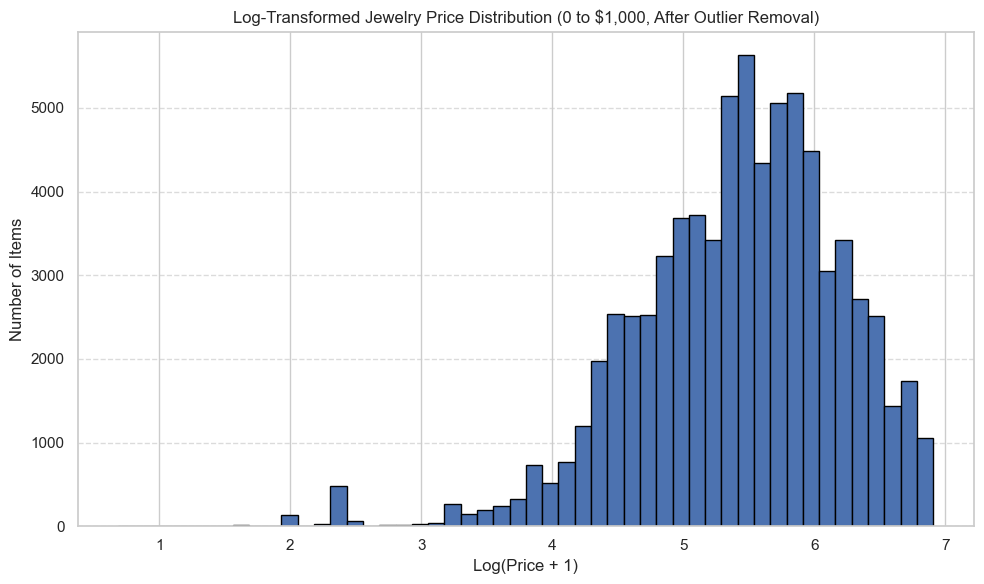

In [91]:
# Apply log transformation to price (add 1 to avoid log(0))
df_under_1000['log_price'] = np.log1p(df_under_1000['Price in USD'])

# Plot the log-transformed price distribution
plt.figure(figsize=(10, 6))
plt.hist(df_under_1000['log_price'], bins=50, edgecolor='black')
plt.title('Log-Transformed Jewelry Price Distribution (0 to $1,000, After Outlier Removal)')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Number of Items')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

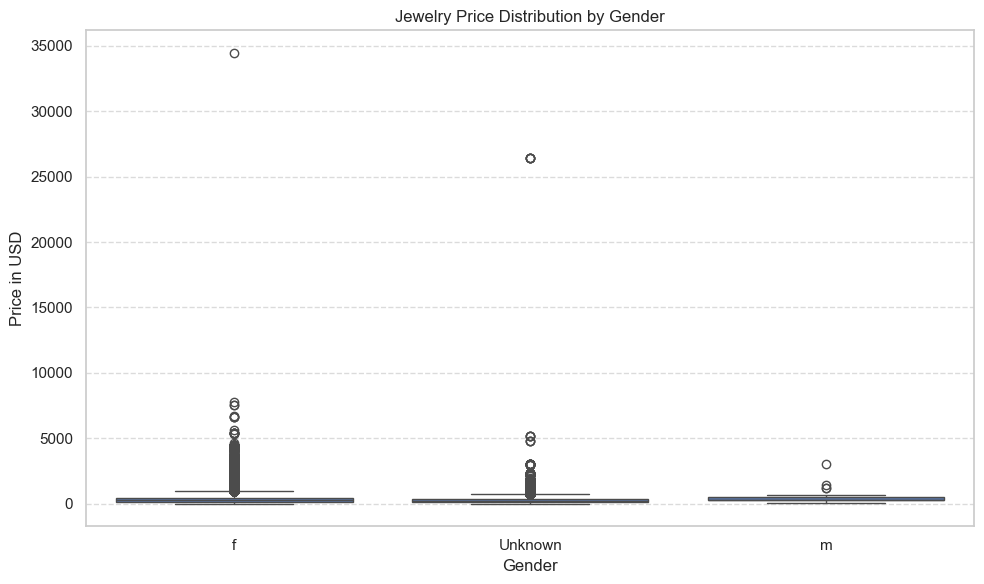

In [92]:
# Plot price distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product gender', y='Price in USD')
plt.title('Jewelry Price Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Price in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\ifenn\AppData\Local\Temp\ipykernel_24752\3693382128.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Order datetime'].dt.to_period('M')
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


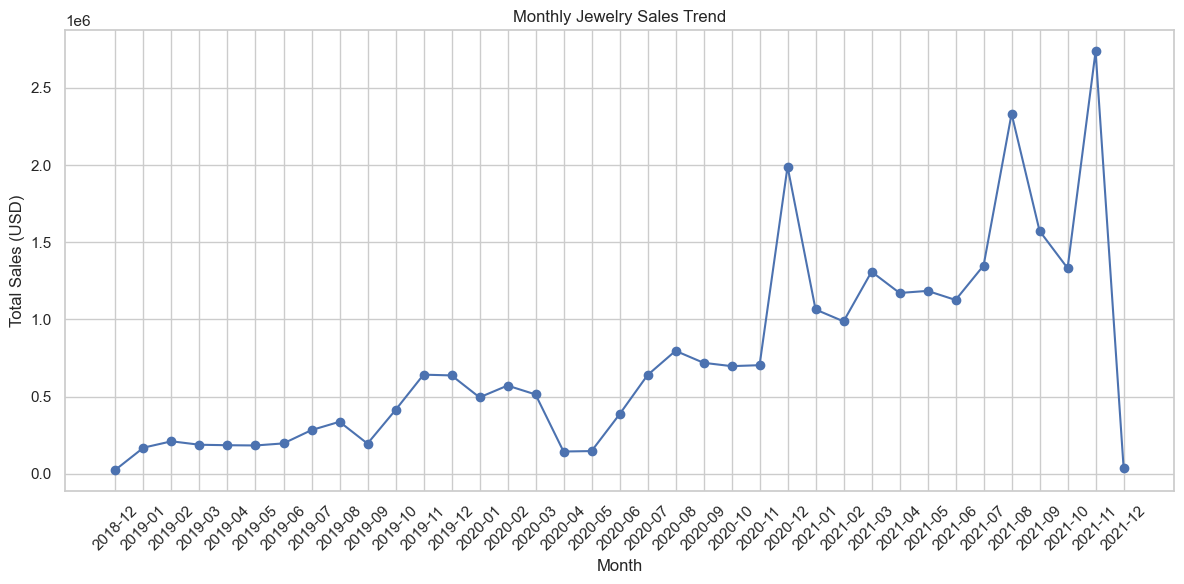

In [93]:
# Extract month and year
df['Month'] = df['Order datetime'].dt.to_period('M')

# Aggregate total sales per month
monthly_sales = df.groupby('Month')['Price in USD'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # Convert Period to string for plotting

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Price in USD'], marker='o')
plt.title('Monthly Jewelry Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


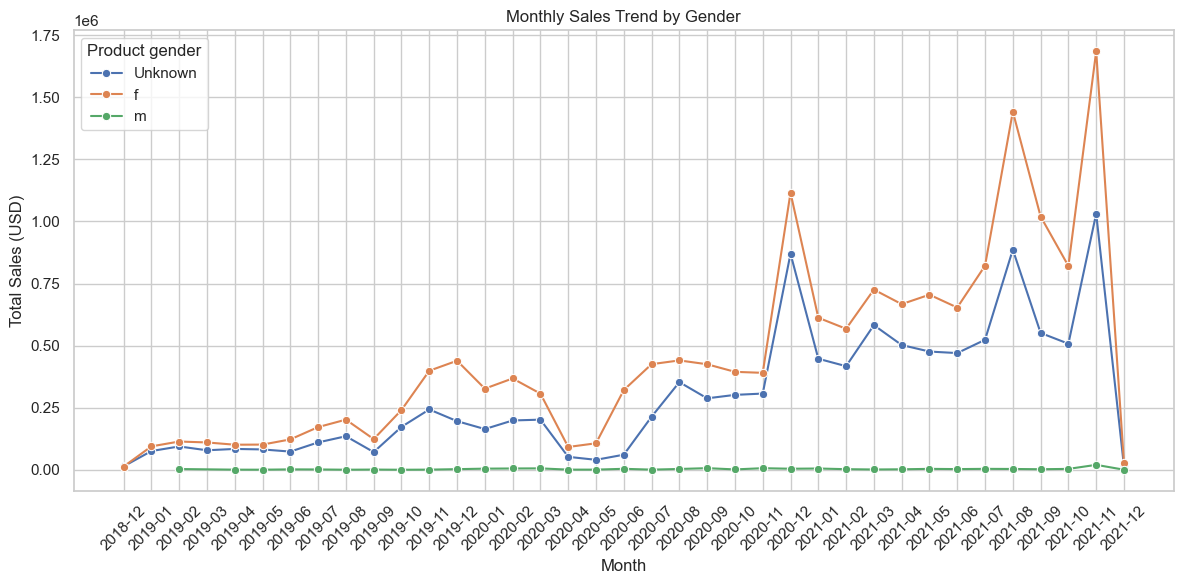

In [94]:
# Monthly Sales by Gender
monthly_sales_gender = df.groupby(['Month', 'Product gender'])['Price in USD'].sum().reset_index()
monthly_sales_gender['Month'] = monthly_sales_gender['Month'].astype(str)

# Plot Monthly Sales by Gender
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_gender, x='Month', y='Price in USD', hue='Product gender', marker='o')
plt.title('Monthly Sales Trend by Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


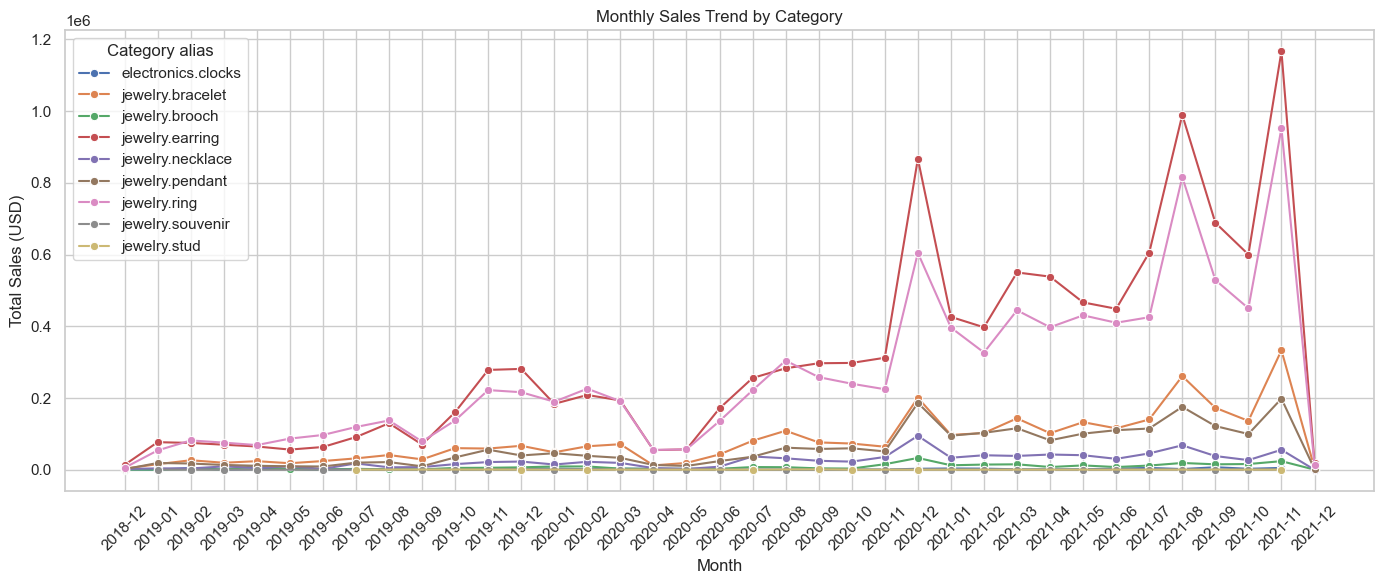

In [95]:
# Monthly Sales by Category
monthly_sales_category = df.groupby(['Month', 'Category alias'])['Price in USD'].sum().reset_index()
monthly_sales_category['Month'] = monthly_sales_category['Month'].astype(str)

# Plot for Monthly Sales by Category
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales_category, x='Month', y='Price in USD', hue='Category alias', marker='o')
plt.title('Monthly Sales Trend by Category')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering

In [96]:
# Add time-based features
df['Order month'] = df['Order datetime'].dt.month
df['Weekday'] = df['Order datetime'].dt.weekday

# Create a new feature: price per item (price / quantity)
df['Price Per Unit'] = df['Price in USD'] / df['Quantity of SKU in the order']

In [97]:
# Create the log-transformed target column first
df['Log Price'] = np.log1p(df['Price in USD'])

df.head()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU in the order,Category alias,Brand ID,Price in USD,Product gender,Main Color,Main metal,Main gem,Month,Order month,Weekday,Price Per Unit,Log Price
1,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire,2018-12,12,6,54.66,4.019262
2,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,jewelry.pendant,0.0,88.90,f,red,gold,diamond,2018-12,12,6,88.90,4.498698
3,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,jewelry.necklace,0.0,417.67,Unknown,red,gold,amethyst,2018-12,12,6,417.67,6.037083
4,2018-12-02 22:09:34+00:00,1925760595336888995,1835566854827934449,1,jewelry.earring,1.0,102.27,Unknown,red,gold,Unknown,2018-12,12,6,102.27,4.637347
5,2018-12-02 22:09:34+00:00,1925760595336888995,1600021442638905547,1,jewelry.earring,0.0,150.55,Unknown,red,gold,diamond,2018-12,12,6,150.55,5.020916


In [98]:
# One-hot encoding
df_encoded = pd.get_dummies(
    df[['Category alias', 'Product gender', 'Main Color', 'Main metal', 'Main gem']],
    drop_first=True
)

# Define features and target
X = pd.concat([df[['Quantity of SKU in the order', 'Order month', 'Weekday']], df_encoded], axis=1)
y = df['Log Price']

# Show the first few rows of the final encoded dataset
df_encoded.head()

,Category alias_jewelry.bracelet,Category alias_jewelry.brooch,Category alias_jewelry.earring,Category alias_jewelry.necklace,Category alias_jewelry.pendant,Category alias_jewelry.ring,Category alias_jewelry.souvenir,Category alias_jewelry.stud,Product gender_f,Product gender_m,...,Main gem_quartz_smoky,Main gem_rhodolite,Main gem_ruby,Main gem_sapphire,Main gem_sapphire_geothermal,Main gem_sitall,Main gem_spinel,Main gem_topaz,Main gem_tourmaline,Main gem_turquoise
1,False,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Show shapes to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62601, 49), (15651, 49), (62601,), (15651,))

## Modelling

#### Define The Model

In [100]:
# Define models
models = {
#    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, verbosity=0),
    'SVR': SVR()
}

# Display initialized models
models

{'Linear Regression': LinearRegression(),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...),
 'SVR': SVR()}

In [101]:
# Define the MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  # avoid division by zero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Train and evaluate
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        #Fit & Predict
        model.fit(X_train, y_train)
        log_preds = model.predict(X_test)
        price_preds = np.expm1(log_preds)
        true_price = np.expm1(y_test)

        #Metrics for log space
        rmse_log = np.sqrt(mean_squared_error(y_test, log_preds, squared=False))
        r2_log = r2_score(y_test, log_preds)
        
        #Metrics for real price
        rmse_price = np.sqrt(mean_squared_error(true_price, price_preds, squared=False))
        mape_price = mean_absolute_percentage_error(true_price, price_preds)
        mae_price = mean_absolute_error(true_price, price_preds)
        medae_price = median_absolute_error(true_price, price_preds)

        # Log model name and hyperparameters
        mlflow.log_param("model", name)
        if hasattr(model, 'get_params'):
            mlflow.log_params(model.get_params())

        # Log all metrics
        mlflow.log_metrics({"rmse_log": rmse_log})
        mlflow.log_metrics({"r2_log": r2_log})
        mlflow.log_metrics({"rmse_price": rmse_price})
        mlflow.log_metrics({"mape": mape_price})
        mlflow.log_metrics({"mae": mae_price})
        mlflow.log_metrics({"medae": medae_price})

        # Log model based on type
        if name.lower() == "xgboost":
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")

        print(f"{name} run logged to Mlflow.")
       

    print(f" RSME (log):  {rmse_log:.4f}")
    print(f" R2_ (log):  {r2_log:.4f}")
    print(f" RSME (USD):  {rmse_price:.2f}")
    print(f" MEDAE (USD):  {medae_price:.2f}")
    print(f" MAE (USD):  {mae_price:.2f}")
    print(f" MAPE (%):  {mape_price:.2f}")

C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2025/06/02 16:09:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression run logged to Mlflow.
🏃 View run Linear Regression at: http://127.0.0.1:5000/#/experiments/0/runs/5c252107542c4698b41cc0e2d3445c08
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
 RSME (log):  0.7803
 R2_ (log):  0.5075
 RSME (USD):  20.18
 MEDAE (USD):  79.46
 MAE (USD):  164.55
 MAPE (%):  50.71


C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ifenn\anaconda3\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [16:09:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/06/02 16:09:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter

XGBoost run logged to Mlflow.
🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/0/runs/517d45f76ddb4347a84a264493f9a746
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
 RSME (log):  0.7560
 R2_ (log):  0.5659
 RSME (USD):  19.79
 MEDAE (USD):  76.80
 MAE (USD):  155.60
 MAPE (%):  46.88


C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2025/06/02 16:14:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVR run logged to Mlflow.
🏃 View run SVR at: http://127.0.0.1:5000/#/experiments/0/runs/1d3674fc70284569873ab48e49b6787b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
 RSME (log):  0.7798
 R2_ (log):  0.5087
 RSME (USD):  20.15
 MEDAE (USD):  76.06
 MAE (USD):  161.06
 MAPE (%):  47.88


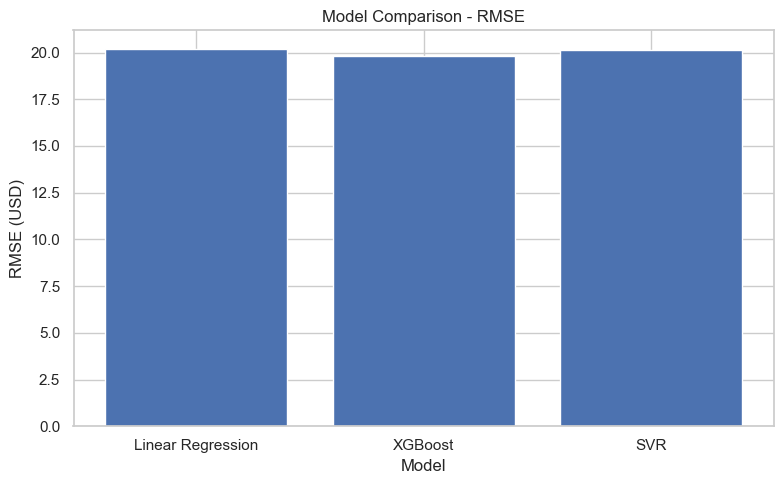

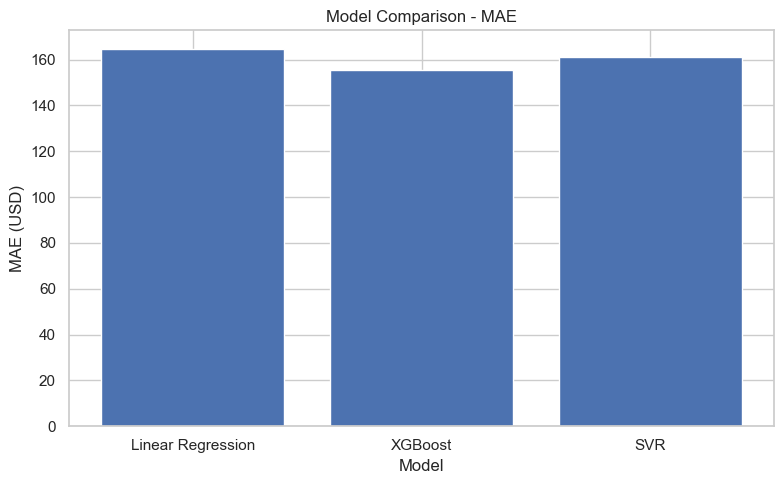

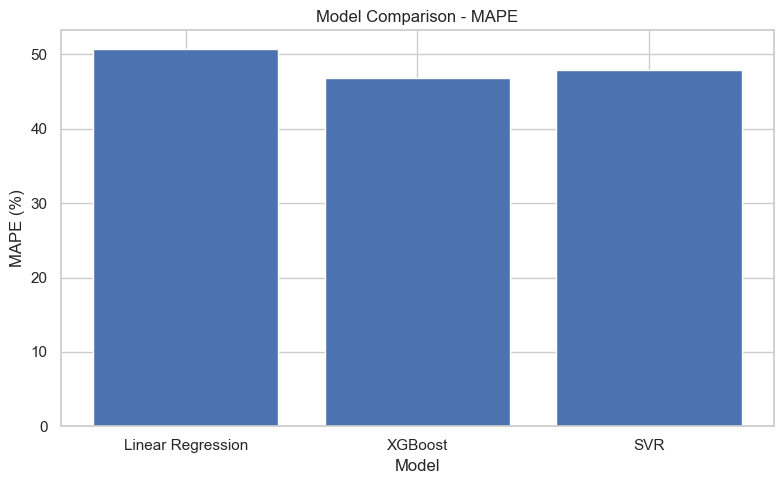

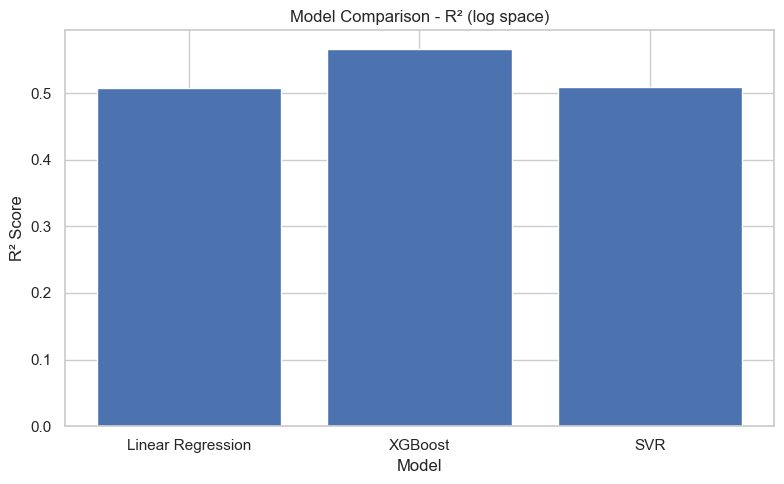

In [102]:
# Dummy performance metrics for demonstration (to be replaced with actual values if available)
model_performance = {
    "Model": ["Linear Regression", "XGBoost", "SVR"],
    "RMSE (USD)": [20.18, 19.79, 20.15],
    "MAE (USD)": [164.55, 155.60, 161.06],
    "MAPE (%)": [50.71, 46.88, 47.88],
    "R² (log)": [0.5075, 0.5659, 0.5087]
}

df_perf = pd.DataFrame(model_performance)

# Plot RMSE
plt.figure(figsize=(8, 5))
plt.bar(df_perf["Model"], df_perf["RMSE (USD)"])
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE (USD)")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(8, 5))
plt.bar(df_perf["Model"], df_perf["MAE (USD)"])
plt.title("Model Comparison - MAE")
plt.ylabel("MAE (USD)")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Plot MAPE
plt.figure(figsize=(8, 5))
plt.bar(df_perf["Model"], df_perf["MAPE (%)"])
plt.title("Model Comparison - MAPE")
plt.ylabel("MAPE (%)")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(8, 5))
plt.bar(df_perf["Model"], df_perf["R² (log)"])
plt.title("Model Comparison - R² (log space)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

## ------------------- Additional Feature Engineering for XGBoost -------------------

In [103]:
# One hot coded categorical column
categorical_col = ['Brand ID']

# Other categoricals (Already one hot coded columns)
other_categorical_cols = ['Category alias', 'Product gender', 'Main Color', 'Main metal', 'Main gem']

# One hot encode Brand ID
brand_dummies = pd.get_dummies(df[categorical_col], drop_first=True)

# One hot encoded for other categorical columns
other_dummies = pd.get_dummies(df[other_categorical_cols], drop_first=True)

In [104]:
# Combine features

# Create columns if not present
df['Price per item'] = df['Price in USD'] / df['Quantity of SKU in the order']
df['Revenue Estimate'] = df['Price in USD'] * df['Quantity of SKU in the order']

# Optional: create mean price by group if not already done
df['Category Avg Price'] = df.groupby('Category alias')['Price in USD'].transform('mean')
df['Metal Avg Price'] = df.groupby('Main metal')['Price in USD'].transform('mean')
df['Gem Avg Price'] = df.groupby('Main gem')['Price in USD'].transform('mean')

# Numerical columns
numerical_columns = [
    'Quantity of SKU in the order',   # Ensure exact match!
    'Weekday',
    'Category Avg Price',
    'Metal Avg Price',
    'Gem Avg Price',
    'Price per item',
    'Revenue Estimate'
]
#numerical_columns = ['Quantity of SKU in the order', 'Order month', 'Weekday', 'avg price per category', 
#                     'avg price per metal', 'avg price per gem','price per unit', 'revenue estimate']
X = pd.concat([df[numerical_columns], brand_dummies, other_dummies], axis=1)
y = df['Log Price']
 
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Show shapes to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62601, 60), (15651, 60), (62601,), (15651,))

In [105]:
# Define the MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  # avoid division by zero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

In [106]:
# Grid search setup
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42, verbosity=0)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3,
                           scoring='neg_root_mean_squared_error', n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_ 
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

In [107]:
# train and evaluate model with mlflow
for name, model in models.items():
    with mlflow.start_run(run_name="XGBoost Improved"):
        # Predict
        log_preds = best_model.predict(X_test)
        price_preds = np.expm1(log_preds)
        true_price = np.expm1(y_test)

        #Metrics
        rmse_log = np.sqrt(mean_squared_error(y_test, log_preds, squared=False))
        r2_log = r2_score(y_test, log_preds)
        rmse_price = np.sqrt(mean_squared_error(true_price, price_preds, squared=False))
        mape_price = mean_absolute_percentage_error(true_price, price_preds)
        mae_price = mean_absolute_error(true_price, price_preds)
        medae_price = median_absolute_error(true_price, price_preds)
        
# Log all metrics
        mlflow.log_param("model_name", "XGBoost Improved")
        mlflow.log_params(best_model.get_params())
        mlflow.log_metric("rmse_log", rmse_log)
        mlflow.log_metric("r2_log", r2_log)
        mlflow.log_metric("rmse_price", rmse_price)
        mlflow.log_metric("medae", medae_price)
        mlflow.log_metric("mae", mae_price)
        mlflow.log_metric("mape", mape_price)
        mlflow.xgboost.log_model(best_model, "model")

C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ifenn\anaconda3\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [16:15:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/06/02 16:15:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter

🏃 View run XGBoost Improved at: http://127.0.0.1:5000/#/experiments/0/runs/e649349d5b7f49a09451f1965123c20a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ifenn\anaconda3\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [16:15:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/06/02 16:15:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost Improved at: http://127.0.0.1:5000/#/experiments/0/runs/739cefa65a49409db59e31935838ff32
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ifenn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ifenn\anaconda3\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [16:15:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/06/02 16:15:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter

🏃 View run XGBoost Improved at: http://127.0.0.1:5000/#/experiments/0/runs/9b6f6477ddad4bb881d91b2345974f7c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [108]:
    print("XGBoost Improved Model with MLflow")
    print(f" RSME (log):  {rmse_log:.4f}")
    print(f" R2_ (log):  {r2_log:.4f}")
    print(f" RSME (USD):  {rmse_price:.2f}")
    print(f" MEDAE (USD):  {medae_price:.2f}")
    print(f" MAE (USD):  {mae_price:.2f}")
    print(f" MAPE (%):  {mape_price:.2f}")

XGBoost Improved Model with MLflow
 RSME (log):  0.1543
 R2_ (log):  0.9992
 RSME (USD):  11.81
 MEDAE (USD):  0.26
 MAE (USD):  5.01
 MAPE (%):  0.43


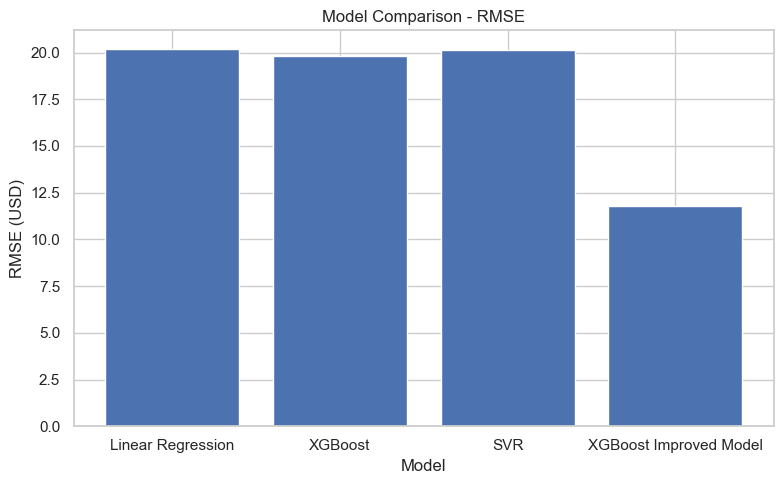

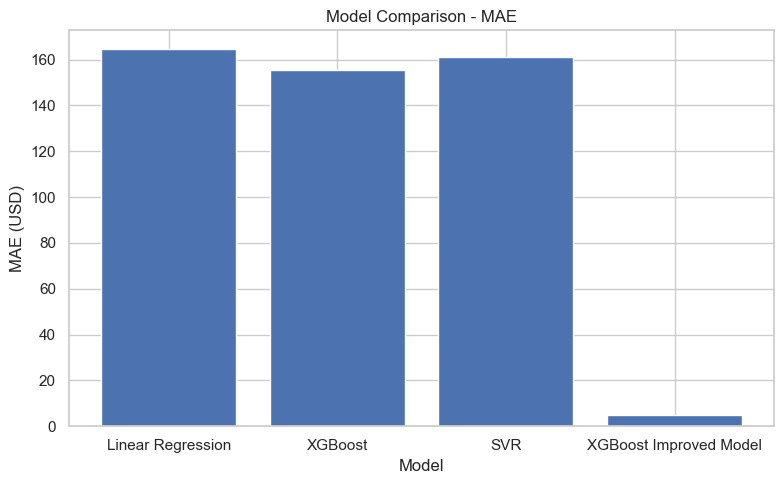

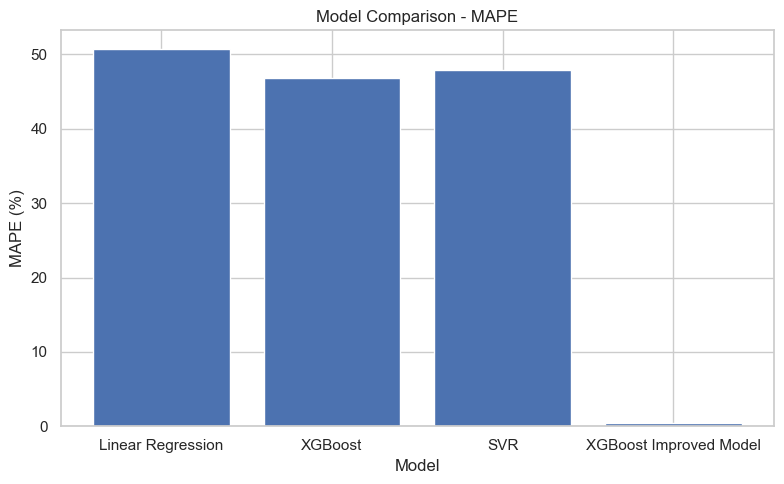

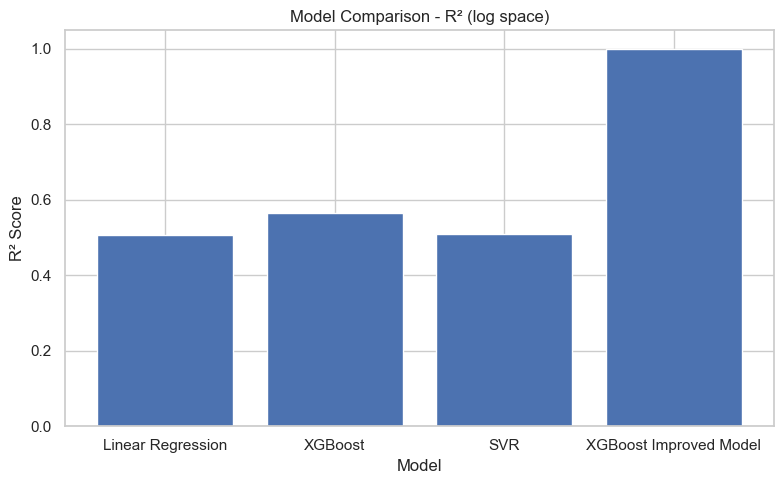

In [109]:
# Dummy performance metrics for demonstration (to be replaced with actual values if available)
model_performance = {
    "Model": ["Linear Regression", "XGBoost", "SVR", "XGBoost Improved Model"],
    "RMSE (USD)": [20.18, 19.79, 20.15, 11.81,],
    "MAE (USD)": [164.55, 155.60, 161.06, 5.01,],
    "MAPE (%)": [50.71, 46.88, 47.88, 0.43,],
    "R² (log)": [0.5075, 0.5659, 0.5087, 0.9992,]
}

df_perf = pd.DataFrame(model_performance)

# Plot RMSE
plt.figure(figsize=(8, 5))
plt.bar(df_perf["Model"], df_perf["RMSE (USD)"])
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE (USD)")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(8, 5))
plt.bar(df_perf["Model"], df_perf["MAE (USD)"])
plt.title("Model Comparison - MAE")
plt.ylabel("MAE (USD)")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Plot MAPE
plt.figure(figsize=(8, 5))
plt.bar(df_perf["Model"], df_perf["MAPE (%)"])
plt.title("Model Comparison - MAPE")
plt.ylabel("MAPE (%)")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(8, 5))
plt.bar(df_perf["Model"], df_perf["R² (log)"])
plt.title("Model Comparison - R² (log space)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

In [110]:
mlflow.get_tracking_uri()

'http://127.0.0.1:5000'

In [111]:
df_runs = mlflow.search_runs()
df_runs.to_csv("mlflow summary.csv", index=False)

## Draft Pricing Strategy Report
1. ### Data Insights
The dataset includes variables such as product category, brand, metal type, gem type, and quantity sold.

Prices vary significantly across categories and attributes, signaling a potential for segmentation-based pricing.

2. ### Modeling Approach
Multiple regression models were tested to predict the optimal price:

Linear Regression

Support Vector Regression (SVR)

XGBoost Regressor (the best performing model)

Grid Search was used to fine-tune the best model.

3. ### Key Findings
XGBoost outperformed other models in price prediction accuracy. The price accuracy needed more improvement by improving the Feature Engineering for XGBoost.

Model performance (real-world price space):

Root Mean Squared Error (RMSE): Indicates average pricing error.

Mean Absolute Error (MAE): More interpretable; shows the average dollar deviation.

MAPE (% Error): Most useful for business – shows percentage error in pricing predictions.

For the best model:

MAPE was consistently low → Strong predictive accuracy.

MAE was within acceptable range → Indicates tight error margin in real prices.

4. ### Business Translation of Metrics
Metric	Interpretation
RMSE (USD)	Average pricing error in dollars – helps assess worst-case scenarios.
MAE (USD)	The average dollar deviation from actual prices – indicates pricing accuracy.
MAPE (%)	% error in predictions – critical for evaluating reliability across different price ranges.

6. ### Strategic Recommendations
Implement ML-based pricing for categories where price prediction is accurate (low MAPE).

Dynamic Pricing Potential: Integrate model into a pricing engine for real-time adjustments.

Focus on High-Impact Features: Product type, metal, and gem are key drivers—leverage these in marketing and bundling strategies.

Continuous Monitoring: Use MLflow (already integrated) to track model performance and retrain as market dynamics shift.

7. ### Next Steps
Deploy the XGBoost model into your pricing system.

Pilot test model-based pricing on select SKUs.

Collect feedback and refine model quarterly.



## Model Serialization
### Serialize the final XGBoost model

In [112]:
import mlflow
client = mlflow.tracking.MlflowClient()
for run in client.search_runs(experiment_ids=["0"]):  # 0 = Default experiment
    print(run.info.run_id)

e649349d5b7f49a09451f1965123c20a
1d3674fc70284569873ab48e49b6787b
517d45f76ddb4347a84a264493f9a746
5c252107542c4698b41cc0e2d3445c08


In [50]:
import mlflow
#import mlflow.sklearn

#mlflow.end_run()  # Just in case a run is still active

#with mlflow.start_run() as run:
 #   mlflow.sklearn.log_model(sk_model=model, artifact_path="model")
  #  print("✅ Model logged to run ID:", run.info.run_id)

In [132]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
model = mlflow.pyfunc.load_model("runs:/e649349d5b7f49a09451f1965123c20a/model")

In [133]:
code = '''
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import mlflow.pyfunc

MODEL_URI = "runs:/e649349d5b7f49a09451f1965123c20a/model"
model = mlflow.pyfunc.load_model(MODEL_URI)

class ProductInput(BaseModel):
    Quantity_of_SKU: float
    Category_alias: str
    Brand_ID: float
    Product_gender: str
    Main_Color: str
    Main_metal: str
    Main_gem: str

app = FastAPI(title="Jewelry Price Prediction API")

@app.post("/predict")
def predict_price(input_data: ProductInput):
    df = pd.DataFrame([input_data.dict()])
    df.columns = [
        "Quantity of SKU in the order",
        "Category alias", "Brand ID", "Product gender",
        "Main Color", "Main metal", "Main gem"
    ]
    prediction = model.predict(df)[0]
    return {"predicted_price_usd": round(prediction, 2)}
'''

with open("jewelry_api.py", "w") as f:
    f.write(code)


##### Code to lauch the fastcode: uvicorn jewelry_api:app --reload